In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
# pip install opfunu

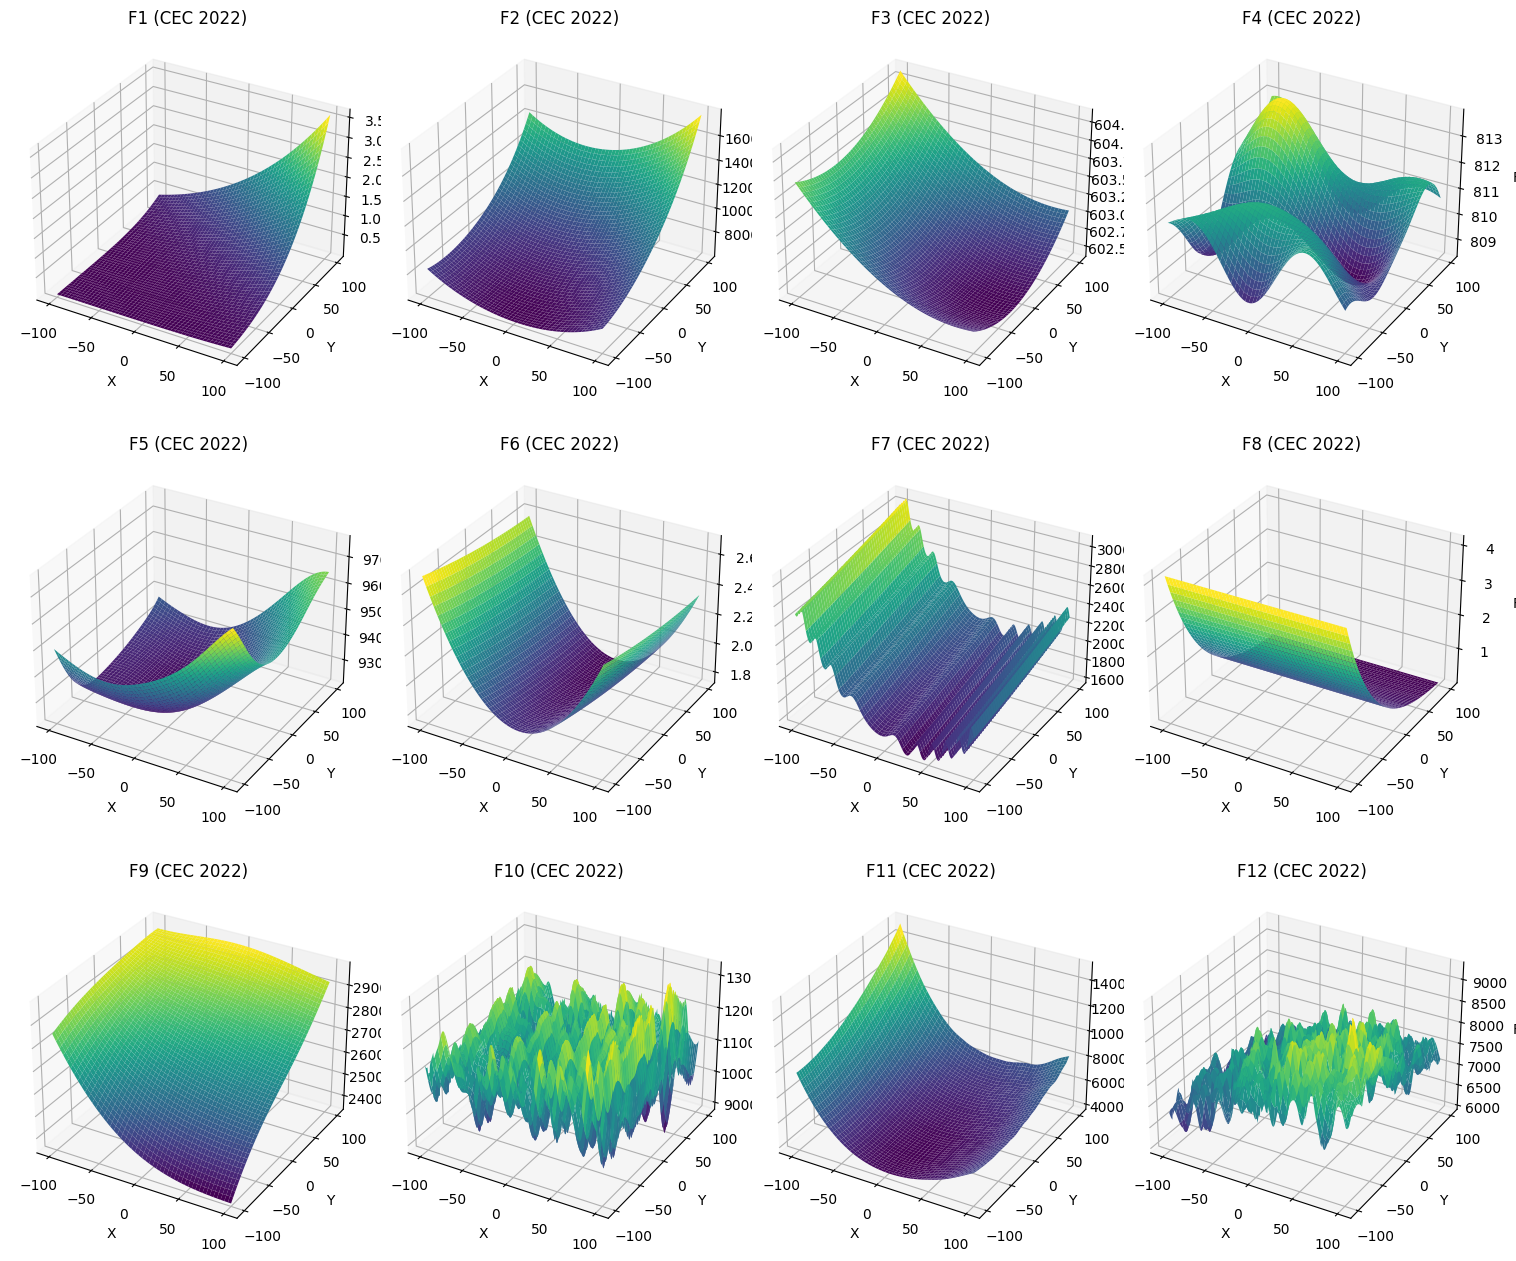

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from opfunu.cec_based.cec2022 import *

def func_plot_cec(func, ax, dimension=2):
    lb = -100
    ub = 100
    x = np.linspace(lb, ub, 400)
    y = np.linspace(lb, ub, 400)
    X, Y = np.meshgrid(x, y)
    
    if dimension == 2:
        Z = np.array([[func.evaluate(np.array([x_val, y_val])) for x_val in x] for y_val in y])
    else:
        Z = np.zeros(X.shape)
        for i in range(Z.shape[0]):
            for j in range(Z.shape[1]):
                Z[i, j] = func.evaluate(np.array([X[i, j], Y[i, j]] + [0] * (dimension - 2)))

    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('F')


# Create instances of the CEC benchmark functions with the desired dimension (e.g., 30)
benchmark_functions = [
    F12022(ndim=20), F22022(ndim=20), F32022(ndim=20), F42022(ndim=20), F52022(ndim=20),
     F62022(ndim=20), F72022(ndim=20), F82022(ndim=20), F92022(ndim=20), F102022(ndim=20),
    F112022(ndim=20), F122022(ndim=20)
]

fig = plt.figure(figsize=(15, 30))  # Adjust figure size as needed

for i, func in enumerate(benchmark_functions):
    ax = fig.add_subplot(7, 4, i + 1, projection='3d')  # Adjust the number of rows and columns as needed
    func_plot_cec(func, ax, dimension=20)  # Use dimension=2 for 2D functions
    ax.set_title(f'F{i+1} (CEC 2022)')

plt.subplots_adjust(top=0.9, wspace=0.3, hspace=0.5)  # Adjust spacing as needed
plt.tight_layout()
plt.show()